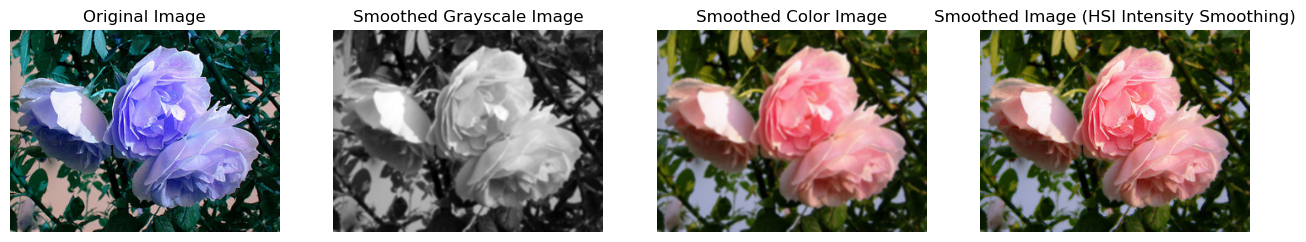

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Theoretical Overview and Manual Calculation:
# This program demonstrates image smoothing techniques using different methods and models. The objective is to smooth an image
# using three distinct approaches: grayscale smoothing, color channel smoothing (RGB), and intensity component smoothing using
# the HSI (Hue, Saturation, Intensity) model. We will use a kernel-based filter to perform the smoothing operation and 
# display the results for comparison.

# The different approaches are:
# 1. Grayscale Image Smoothing: Applying smoothing to a single intensity channel (grayscale image).
# 2. Color Image Smoothing: Smoothing each color channel (Red, Green, Blue) independently.
# 3. Intensity Component Smoothing using HSI: Using the HSI color model, smoothing only the intensity component while preserving hue and saturation.

# Manual Calculation for Kernel-based Image Smoothing:
# A kernel (also known as a filter) is a small matrix that is applied to an image to perform operations like blurring, sharpening, etc.
# Here, we use a Gaussian kernel for smoothing (blurring).
#
# Example of a Gaussian kernel:
# The Gaussian kernel is typically calculated using a Gaussian function and defines the weight of surrounding pixels. 
# A simple Gaussian kernel can be created using OpenCV's cv2.GaussianBlur() function.
#
# Mathematically, for each pixel (i, j) in the image, the smoothed value is calculated as:
# S(i,j) = Σ (image(x,y) * kernel(x-i, y-j)) for the neighboring pixels (x,y)
# where S(i,j) is the smoothed pixel value at position (i,j) in the output image.

# Importing necessary libraries:
# os - for handling file paths
# cv2 - OpenCV for image processing
# numpy - for matrix operations
# matplotlib - for displaying images

# Function to display images
def display_images(original, smoothed_gray, smoothed_color, smoothed_hsi, title_original, title_smoothed_gray, title_smoothed_color, title_smoothed_hsi):
    # This function displays the original image along with its smoothed versions (grayscale, color, HSI intensity smoothing) side by side.
    plt.figure(figsize=(16, 6))

    # Display Original Grayscale Image
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')  # Using grayscale colormap for the original image
    plt.title(title_original)  # Set title for the image
    plt.axis('off')  # Hide axes for better viewing

    # Display Smoothed Grayscale Image
    plt.subplot(1, 4, 2)
    plt.imshow(smoothed_gray, cmap='gray')  # Grayscale colormap for the smoothed image
    plt.title(title_smoothed_gray)
    plt.axis('off')

    # Display Smoothed Color Image
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(smoothed_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
    plt.title(title_smoothed_color)
    plt.axis('off')

    # Display Smoothed HSI Image
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(smoothed_hsi, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
    plt.title(title_smoothed_hsi)
    plt.axis('off')

    plt.show()  # Show the images

# Define kernel size for Gaussian smoothing
kernel_size = 5  # Kernel size: 5x5 matrix

# ------------ Load the Color Image ------------- #
# Load a color image (roses.jpg) from the 'data/images' directory. The image will be read in BGR format by default in OpenCV.
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Path to the image
image = cv2.imread(image_path)  # Read the image in BGR color format

# ------------ Grayscale Image Smoothing ------------ #
# Convert the image from BGR to Grayscale (single channel) using OpenCV.
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Gaussian blur to the grayscale image using the kernel size defined above.
smoothed_image_gray = cv2.GaussianBlur(image_gray, (kernel_size, kernel_size), 0)

# ------------ Color Image Smoothing ------------ #
# Split the color image into its individual color channels (Blue, Green, Red).
B, G, R = cv2.split(image)

# Apply Gaussian blur to each color channel independently using the kernel size defined above.
smoothed_R = cv2.GaussianBlur(R, (kernel_size, kernel_size), 0)
smoothed_G = cv2.GaussianBlur(G, (kernel_size, kernel_size), 0)
smoothed_B = cv2.GaussianBlur(B, (kernel_size, kernel_size), 0)

# Merge the smoothed channels (Blue, Green, Red) back together to form the smoothed color image.
smoothed_image_color = cv2.merge([smoothed_B, smoothed_G, smoothed_R])

# ------------ HSI Intensity Component Smoothing ------------ #
# Convert the color image to the HSV color model (HSI is similar to HSV in OpenCV).
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract the three channels from the HSV image: Hue (H), Saturation (S), and Intensity (I).
h, s, i = cv2.split(hsv_image)

# Apply Gaussian blur to only the Intensity channel (I) using the kernel size defined above.
smoothed_i = cv2.GaussianBlur(i, (kernel_size, kernel_size), 0)

# Merge the smoothed intensity channel back with the original Hue and Saturation channels.
smoothed_hsv_image = cv2.merge([h, s, smoothed_i])

# Convert the modified HSV image back to BGR color format for visualization.
smoothed_rgb_image = cv2.cvtColor(smoothed_hsv_image, cv2.COLOR_HSV2BGR)

# ------------ Display Results ------------ #
# Now we display all the images (original and smoothed images) side by side using the display_images function.
# This will show the original image, the smoothed grayscale image, the smoothed color image, and the smoothed HSI image.

display_images(image, smoothed_image_gray, smoothed_image_color, smoothed_rgb_image, 
               'Original Image', 'Smoothed Grayscale Image', 'Smoothed Color Image', 'Smoothed Image (HSI Intensity Smoothing)')

# In summary:
# This program demonstrates the effect of smoothing on images using three different techniques:
# 1. Grayscale smoothing, where only the intensity of the image is considered.
# 2. Color channel smoothing, where each RGB color channel is smoothed independently.
# 3. Intensity component smoothing in the HSI model, where only the intensity component is smoothed while preserving hue and saturation.
# By visualizing these results, we can observe the differences and understand how each technique affects the image.
